In [1]:
import sklearn.datasets
import numpy as np

<h2> Load Dataset </h2>

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
X = breast_cancer.data
y = breast_cancer.target 

In [4]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [5]:
import pandas as pd

In [6]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [7]:
data['class'] = breast_cancer.target

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

<p> THere are more positive than negative data points </p>

In [10]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<p> We can use the above data to see how the features vary for the two classes </p>

<h2> Train test split </h2>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('class', axis=1)
y = data['class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (143, 30) (143,)


<p> We see that 25 % data has been used for test and remaining 75% for training. We can change that by setting our own test size </p>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [16]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(512, 30) (512,) (57, 30) (57,)


In [17]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

1    357
0    212
Name: class, dtype: int64
1    317
0    195
Name: class, dtype: int64
1    40
0    17
Name: class, dtype: int64


In [18]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.619140625 0.7017543859649122


<p> We observe that the distribution of target variable output(i.e 1's and 0's) is not the same in the train and test set </p>

<p> This is important because..... Therefore we go for stratifying the data</p>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, stratify = y)

In [20]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


<p> Now we can observe that the distribution of 1 and 0 is almost same in the train and test set and it is almost equal to the distribution of target variable output in the original data </p>

<p> Another problem is everytime we do train test split the data point in the train and test set are different, although 
the number of points may remain the same. But this is not good as we will not be able to replicate the results as model will
keep on changing with different set of training data points, So we go for setting a random state </p>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, stratify = y, random_state = 47)

In [22]:
X_train.values

array([[1.088e+01, 1.562e+01, 7.041e+01, ..., 7.966e-02, 2.581e-01,
        1.080e-01],
       [1.086e+01, 2.148e+01, 6.851e+01, ..., 0.000e+00, 2.458e-01,
        6.592e-02],
       [1.094e+01, 1.859e+01, 7.039e+01, ..., 7.887e-02, 2.251e-01,
        7.732e-02],
       ...,
       [1.025e+01, 1.618e+01, 6.652e+01, ..., 9.744e-02, 2.608e-01,
        9.702e-02],
       [1.665e+01, 2.138e+01, 1.100e+02, ..., 2.095e-01, 3.613e-01,
        9.564e-02],
       [9.295e+00, 1.390e+01, 5.996e+01, ..., 7.262e-02, 3.681e-01,
        8.982e-02]])

<h2> Perceptron Model </h2>

In [23]:

import matplotlib.pyplot as plt

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
#My custom function to compute accuracy
def my_accuracy_score(Y_pred, Y_test):
    # Assuming both are of same dimensions
    return 1 - (sum((Y_pred-Y_test)**2)/len(Y_pred))

In [26]:
class Perceptron:
    def _init_(self):
        #MPerceptron has two parameters - weight and bias
        self.b = None
        self.w = None
    
    def model(self,x):
        return(np.dot(self.w, x) >= self.b)
            
        
    def predict(self,X):
        Y=[]
        #Iterate through every observation
        for x in X:
            result = self.model(x)
            Y.append(result)
        
        return np.array(Y)
        
     
    def fit(self, X, Y , epochs = 10, lr = 1):
        accuracy={}
        max_accuracy=0
        # Random initialization of weights
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        # Perceptron Learning Algorithm
        for i in range(epochs):
            #Cycle over all the data point in current epoch
            for x , y in zip(X, Y):
                #Find model prediction for particular observation
                
                y_pred = self.model(x)
                
                if y==0 and y_pred==1 :
                    self.w = self.w - lr * x
                    self.b = self.b + 1
                    
                elif y==1 and y_pred==0 :
                    self.w = self.w + lr * x
                    self.b = self.b - 1
            
            #Compute new accuracy after current epoch       
            accuracy[i] = accuracy_score(self.predict(X) , Y)
            
            if(accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        
        #Storing weights and bias corresponding to best accuracy
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy)
        plt.plot(accuracy.values())
        plt.title('Variation of accuracy with epochs')
        plt.ylim([0,1])
        plt.show()
                
               

In [27]:
perceptron = Perceptron()

In [28]:
#To ensure string values in the titles are not passed as arguments
X_train = X_train.values
X_test = X_test.values

0.923828125


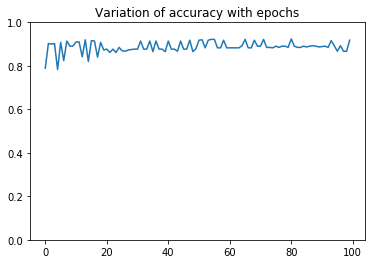

In [29]:
perceptron.fit(X_train, y_train, 100, 0.5)

In [31]:
y_test_pred = perceptron.predict(X_test)


In [32]:
accuracy_score(y_test_pred, y_test)

0.9298245614035088

In [33]:
my_accuracy_score(y_test_pred, y_test)

0.9298245614035088